In [28]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [3]:
#create a set of random latitude and longitude combitnations
lats = np.random.uniform(low=-90.000,high= 90.000, size=1500)
lngs = np.random.uniform(low=-90.000,high=90.000, size=1500)
lats_lngs=zip(lats,lngs)

In [4]:
coordinates=list(lats_lngs)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

arraial do cabo br
busselton au
bulawayo zw
upernavik gl
victoria sc
el cobre cu
linden gy
peniche pt
natal br
road town vg
taolanaro mg
bam ir
jamestown sh
busselton au
sambava mg
ilulissat gl
french harbor hn
cidreira br
yarmouth ca
kannur in
bargal so
sieradz pl
upernavik gl
lagoa pt
natal br
sandwick gb
qaanaaq gl
xinon neron gr
ulundi za
morros br
gaoual gn
adrar dz
mecca sa
qaanaaq gl
laguna br
colesberg za
tasiilaq gl
hithadhoo mv
ushuaia ar
taolanaro mg
naron es
bafq ir
ushuaia ar
shahrud ir
coquimbo cl
east london za
taoudenni ml
belushya guba ru
lonigo it
sinor in
san cristobal ec
cidreira br
salalah om
korla cn
saint-philippe re
iqaluit ca
punta arenas cl
barentsburg sj
taolanaro mg
muros es
malwan in
dabakala ci
narsaq gl
bandarbeyla so
manitouwadge ca
dikson ru
dikson ru
upernavik gl
ayagoz kz
lenki ru
port elizabeth za
jamestown sh
saint-philippe re
grindavik is
tabas ir
ushuaia ar
cape town za
dikson ru
port alfred za
chuy uy
westport ie
sao filipe cv
pangnirtung ca
tako

cape town za
saint anthony ca
east london za
cape town za
kirkwall gb
hithadhoo mv
svetlyy ru
cidreira br
jamestown sh
barentsburg sj
busselton au
cape town za
ouadda cf
bud no
upernavik gl
qaanaaq gl
busselton au
port elizabeth za
dabakala ci
kismayo so
cap malheureux mu
plettenberg bay za
taolanaro mg
cape town za
olinda br
requena pe
upernavik gl
cidreira br
illoqqortoormiut gl
tsihombe mg
tasiilaq gl
torbay ca
fereydun kenar ir
bridlington gb
potsdam us
ushuaia ar
longlac ca
barentsburg sj
karasjok no
ushuaia ar
chuy uy
ribeira grande pt
boquira br
ushuaia ar
vikulovo ru
kuusamo fi
snezhnogorsk ru
isla mujeres mx
hermanus za
marrakesh ma
mahebourg mu
cumaribo co
klaksvik fo
chuy uy
bredasdorp za
tiznit ma
tunduma tz
jamestown sh
ondjiva ao
torbay ca
ribeira grande pt
arraial do cabo br
saint-philippe re
el bagre co
port elizabeth za
buarcos pt
carnarvon au
luderitz na
wladyslawowo pl
birjand ir
lubango ao
cape town za
taolanaro mg
port alfred za
jamestown sh
mrakovo ru
port elizabe

bambous virieux mu
binga cd
san andres co
hermanus za
tiznit ma
masallatah ly
arlit ne
maniitsoq gl
barnaul ru
busselton au
iqaluit ca
qaanaaq gl
matay eg
ribeira grande pt
victoria sc
dingle ie
jalu ly
slonim by
jibuti dj
jutai br
bambous virieux mu
narsaq gl
ushuaia ar
clyde river ca
barentsburg sj
mogadishu so
los llanos de aridane es
upernavik gl
chuy uy
bredasdorp za
new milford us
jamestown sh
rodrigues alves br
burica pa
canavieiras br
ushuaia ar
marzuq ly
mar del plata ar
ribeira grande pt
illoqqortoormiut gl
longyearbyen sj
ushuaia ar
the valley ai
ushuaia ar
cape town za
rondonopolis br
tasiilaq gl
port alfred za
hamilton bm
barentsburg sj
nara ml
kruisfontein za
kermen bg
port shepstone za
port alfred za
luba gq
mahuva in
east london za


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
url="https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=85e88150062045398183e4ab76ba60d3


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=85e88150062045398183e4ab76ba60d3&q=Boston


In [9]:
city_weather=requests.get(city_url)
city_weather

<Response [200]>

In [10]:
city_weather.status_code

200

In [11]:
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":51.87,"feels_like":48.34,"temp_min":50,"temp_max":54,"pressure":1028,"humidity":81},"visibility":10000,"wind":{"speed":4.7,"deg":150},"clouds":{"all":75},"dt":1603159990,"sys":{"type":1,"id":3486,"country":"US","sunrise":1603105328,"sunset":1603144545},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 51.87,
  'feels_like': 48.34,
  'temp_min': 50,
  'temp_max': 54,
  'pressure': 1028,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 150},
 'clouds': {'all': 75},
 'dt': 1603159990,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1603105328,
  'sunset': 1603144545},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
boston_data = city_weather.json()
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1603105328,
 'sunset': 1603144545}

In [14]:
boston_data["sys"]["country"]

'US'

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 54 81 75 4.7


In [16]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 10, 20, 2, 13, 10)

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | bulawayo
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | el cobre
Processing Record 7 of Set 1 | linden
Processing Record 8 of Set 1 | peniche
Processing Record 9 of Set 1 | natal
Processing Record 10 of Set 1 | road town
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | bam
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | sambava
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | french harbor
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | yarmouth
Processing Record 19 of Set 1 | kannur
Processing Record 20 of Set 1 | bargal
City not found. Skipping...
Processing Record 21 of Set 1 | sieradz
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | paamiut
Processing Record 39 of Set 4 | hajdusamson
Processing Record 40 of Set 4 | narasannapeta
Processing Record 41 of Set 4 | quatre cocos
Processing Record 42 of Set 4 | gweta
Processing Record 43 of Set 4 | aksay
Processing Record 44 of Set 4 | sombrio
Processing Record 45 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | abrau-dyurso
Processing Record 48 of Set 4 | santa rosa
Processing Record 49 of Set 4 | burhaniye
Processing Record 50 of Set 4 | trincomalee
Processing Record 1 of Set 5 | gojra
Processing Record 2 of Set 5 | senanga
Processing Record 3 of Set 5 | kavaratti
Processing Record 4 of Set 5 | bonavista
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | stornoway
Processing Record 7 of Set 5 | kargasok
Processing Record 8 of Set 5 | aracati
Processing Record 9 of Set 5 | port blair
Processing Record 10 of Set 5 | muzaffarabad
Processing Record 11 

Processing Record 27 of Set 8 | boquira
Processing Record 28 of Set 8 | vikulovo
Processing Record 29 of Set 8 | kuusamo
Processing Record 30 of Set 8 | snezhnogorsk
Processing Record 31 of Set 8 | isla mujeres
Processing Record 32 of Set 8 | marrakesh
Processing Record 33 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 34 of Set 8 | tiznit
Processing Record 35 of Set 8 | tunduma
Processing Record 36 of Set 8 | ondjiva
Processing Record 37 of Set 8 | el bagre
Processing Record 38 of Set 8 | buarcos
Processing Record 39 of Set 8 | wladyslawowo
Processing Record 40 of Set 8 | birjand
Processing Record 41 of Set 8 | mrakovo
Processing Record 42 of Set 8 | sohbatpur
Processing Record 43 of Set 8 | lokosovo
Processing Record 44 of Set 8 | shache
Processing Record 45 of Set 8 | ust-kan
Processing Record 46 of Set 8 | dudinka
Processing Record 47 of Set 8 | chhapar
Processing Record 48 of Set 8 | barbar
City not found. Skipping...
Processing Record 49 of Set 8 | urengoy
Proc

Processing Record 15 of Set 12 | bodden town
Processing Record 16 of Set 12 | okitipupa
Processing Record 17 of Set 12 | antofagasta
Processing Record 18 of Set 12 | chapais
Processing Record 19 of Set 12 | la macarena
Processing Record 20 of Set 12 | kidal
Processing Record 21 of Set 12 | rio grande
Processing Record 22 of Set 12 | atlantic city
Processing Record 23 of Set 12 | sagua la grande
Processing Record 24 of Set 12 | salinas
Processing Record 25 of Set 12 | casablanca
Processing Record 26 of Set 12 | geraldton
Processing Record 27 of Set 12 | naryan-mar
Processing Record 28 of Set 12 | ulma
Processing Record 29 of Set 12 | albanel
Processing Record 30 of Set 12 | mulatupo
Processing Record 31 of Set 12 | agadez
Processing Record 32 of Set 12 | upanema
Processing Record 33 of Set 12 | huarmey
Processing Record 34 of Set 12 | barawe
City not found. Skipping...
Processing Record 35 of Set 12 | los llanos de aridane
Processing Record 36 of Set 12 | tombouctou
Processing Record 37

In [18]:
len(city_data)

560

In [19]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.97,-42.03,73.40,78,20,18.34,BR,2020-10-20 02:14:05
1,Busselton,-33.65,115.33,68.00,62,0,4.00,AU,2020-10-20 02:15:34
2,Bulawayo,-20.15,28.58,64.24,32,0,5.61,ZW,2020-10-20 02:15:34
3,Upernavik,72.79,-56.15,32.43,95,100,4.54,GL,2020-10-20 02:15:35
4,Victoria,22.29,114.16,77.00,60,0,8.14,HK,2020-10-20 02:11:43
5,El Cobre,20.05,-75.95,78.80,78,20,4.70,CU,2020-10-20 02:15:36
6,Linden,6.00,-58.30,78.80,88,20,4.70,GY,2020-10-20 02:15:01
7,Peniche,39.36,-9.38,64.00,92,100,5.99,PT,2020-10-20 02:15:37
8,Natal,-5.79,-35.21,77.00,83,40,3.36,BR,2020-10-20 02:13:46
9,Road Town,18.42,-64.62,81.00,81,41,5.01,VG,2020-10-20 02:15:37


In [20]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]

In [21]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2020-10-20 02:14:05,-22.97,-42.03,73.40,78,20,18.34
1,Busselton,AU,2020-10-20 02:15:34,-33.65,115.33,68.00,62,0,4.00
2,Bulawayo,ZW,2020-10-20 02:15:34,-20.15,28.58,64.24,32,0,5.61
3,Upernavik,GL,2020-10-20 02:15:35,72.79,-56.15,32.43,95,100,4.54
4,Victoria,HK,2020-10-20 02:11:43,22.29,114.16,77.00,60,0,8.14


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
today = time.strftime("%x")
today


'10/19/20'

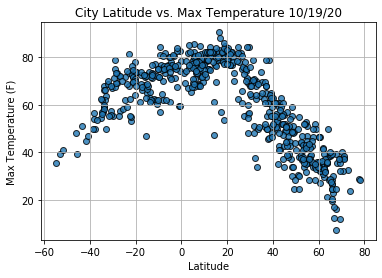

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

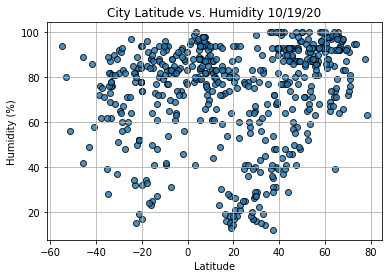

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

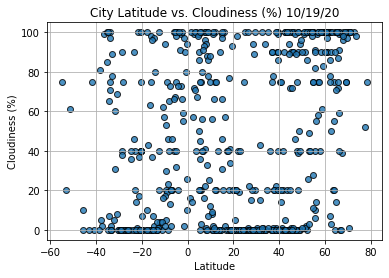

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()